# import

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Functions for plotting


In [74]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in pounds)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [75]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [76]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

# 导入数据集

In [77]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# 多元线性模型

在《英国汽车参数及价格情况分析报告》中研究分析的基础上，我们主要分析马力、车重、引擎大小、高速油耗对于价格的影响。

In [78]:
lm = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression()

In [79]:
lm.intercept_

-15806.624626329198

In [80]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

根据模型拟合得出的线性方程为：

Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

# 用图形来评价不同的模型

## 一元线性回归

(0.0, 48174.12615872559)

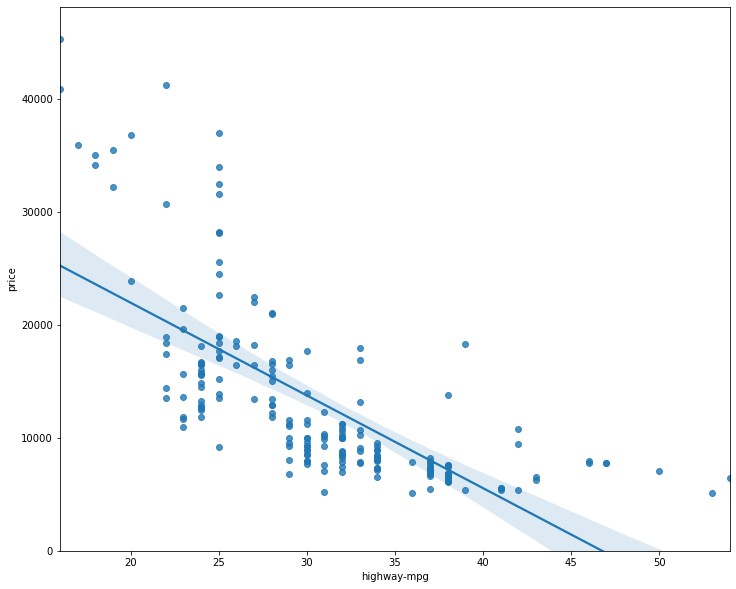

In [81]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

E:\code_programming\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


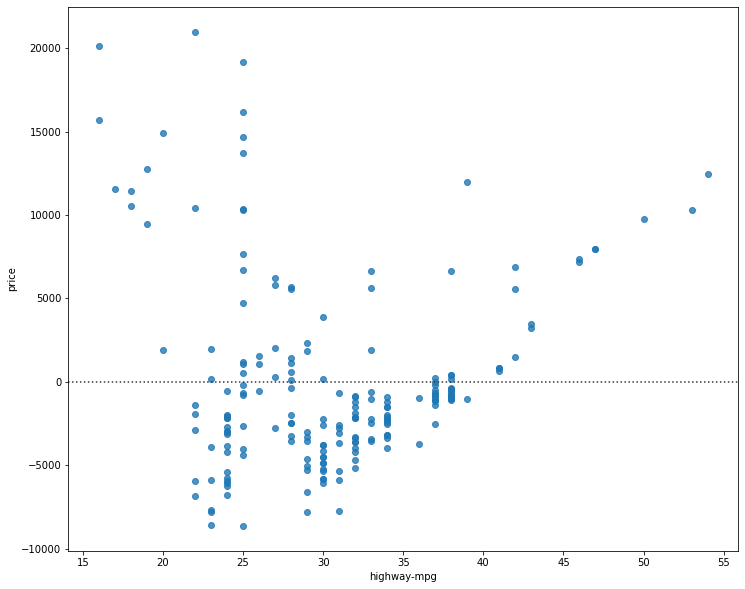

In [82]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df[['highway-mpg']], df['price'])
plt.show()

In [83]:
#highway_mpg_fit
lm.fit(df[['highway-mpg']], df['price'])
# Find the R^2
print('The R-square is: ', lm.score(df[['highway-mpg']], df['price']))

The R-square is:  0.4965911884339175


分析结论：

残差散点图表明残差并没有随机分布在0轴周围，一元线性回归拟合效果不够理想。

## 多元线性回归

因为多元线性模型无法在二维平面可视化，所以我们采用分布图的方式比较模型的拟合优度。

In [84]:
lm.fit(Z, df['price'])
Y_hat = lm.predict(Z)

E:\code_programming\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\code_programming\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


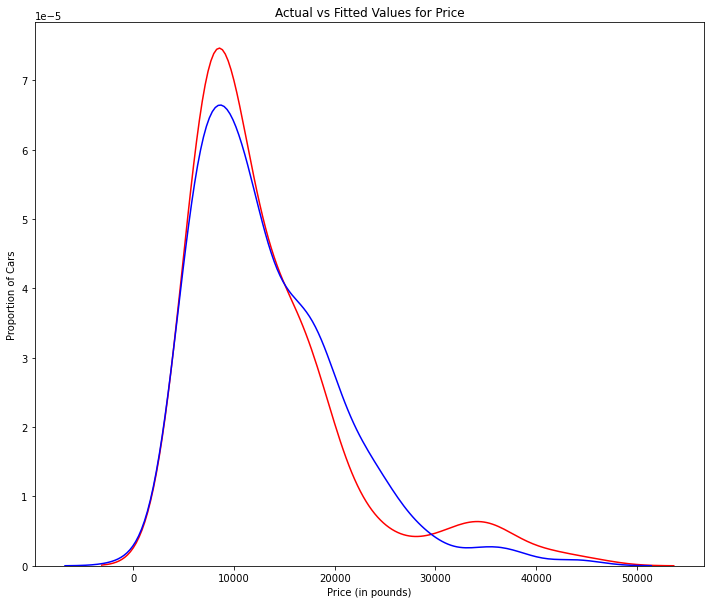

In [85]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in pounds)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [86]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


就重合状况和R方来看，我们发现相比于一元线性模型，该模型的拟合效果更好，但仍然有提升空间

## 多项式回归（三次）

In [87]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [88]:
x = df['highway-mpg']
y = df['price']
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


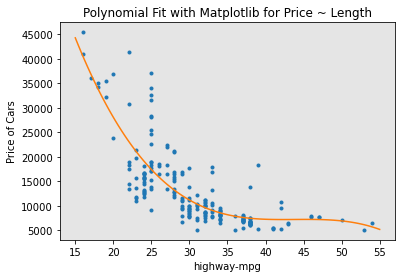

In [89]:
PlotPolly(p, x, y, 'highway-mpg')

In [90]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


我们发现似乎多项式回归的效果比线性模型又更进一步，模型拟合了更多的数据点。但是R方却比多元线性模型的低。


**综上，目前多元线性模型是最优的模型**

---

# 使用测试数据进一步评价模型

显然仅仅使用R方来判断模型的拟合程度还不够使人信服，为了提高该模型的适用推广性，我们采用分割数据集的方式对于模型进行测试。


In [91]:
y_data = df['price']
x_data=df.drop('price',axis=1)

首先，我们将原始的数据集分为两个部分，一个作为训练模型的数据样本，一个作为测试模型的数据样本；并且测试样本占比10%


In [92]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [93]:
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)
print(lre.score(x_test[['horsepower']], y_test))
print(lre.score(x_train[['horsepower']], y_train))

0.3635875575078824
0.6619724197515103


可以见到测试数据样本的R方为0.36，小于训练数据样本的R方（0.66）

同时我们使用图形进行验证

In [94]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

E:\code_programming\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\code_programming\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


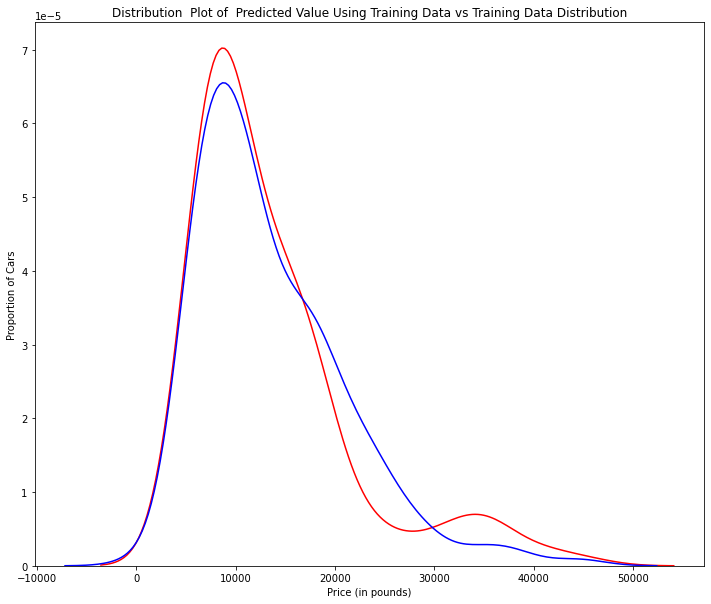

In [95]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the training data. 


E:\code_programming\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
E:\code_programming\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


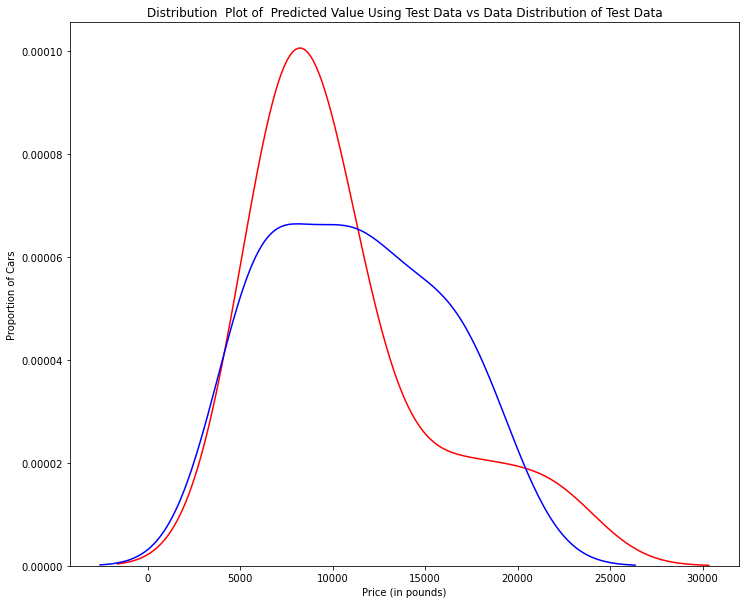

In [96]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figur 2: Plot of predicted value using the test data compared to the test data. 


**很显然图1比图2拟合的更好， 在5000～15000区间，图2的误差尤为明显**

## 交叉验证


但是这里的数据集可能因为数据量不够，造成了拟合优度下降，所以进一步使用交叉验证来评价模型


In [97]:
# 我们将数据集拆为4组进行交叉验证
Rcross = cross_val_score(lre, x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data, cv=4)
print("平均值为：", Rcross.mean(), "标准差为：" , Rcross.std())

平均值为： 0.6645924739294804 标准差为： 0.15620197700259497


经过交叉验证，我们发现多元线性模型的R方约为0.66，勉强可以接受

## 过度拟合



过度拟合：模型过度将一些噪声数据包括在模型学习中。

所以我们考虑到如果剔除过度拟合的影响，是否多项式回归才是最优的模型


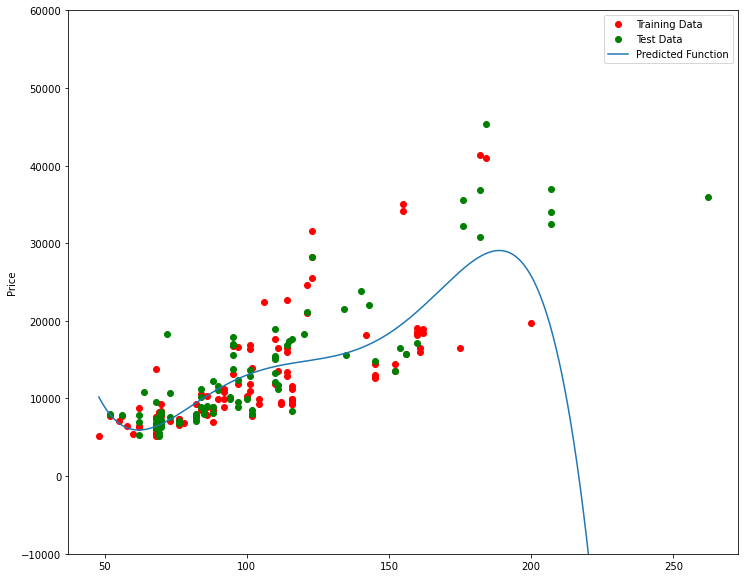

In [98]:
# 此处设置  训练数据：55%；测试数据：45%；对马力变量进行五次方的多项式回归
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

图4 中红点代表训练数据，绿点代表测试数据，蓝线代表模型预测结果



我们发现基本上拟合了大部分的数据点，但是在200hp马力左右的数据出现了较大的偏差


---

 R^2 of the training data:


In [99]:
poly.score(x_train_pr, y_train)

0.5567716902635091

 R^2 of the test data:


In [100]:
poly.score(x_test_pr, y_test)

-29.871418859187518

训练数据的R方为 0.5567；测试数据的R方为-29.87.  

R方越小，模型适用性越差，而这里负的R方则表明过度拟合了



**我们进一步使用R方测试一下，当次数设置为多少时，多项式回归可以达到最优**


Text(3, 0.75, 'Maximum R^2 ')

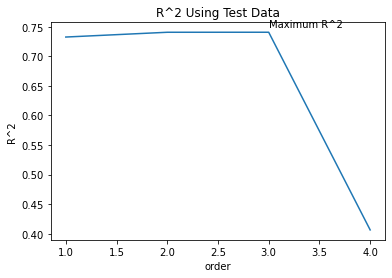

In [101]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

我们看到R方随着次数先增后减，在次数为3时达到最优；由此见得我们在5.3中的次数设定是合理的，但R方依然低于多元线性回归


# 结论

**综上所述，在所有的模型训练中，多元线性回归模型是最优的模型，R方为0.8093562806577457,交叉验证评分为0.6645924739294804**

**最终的线性方程：Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg**